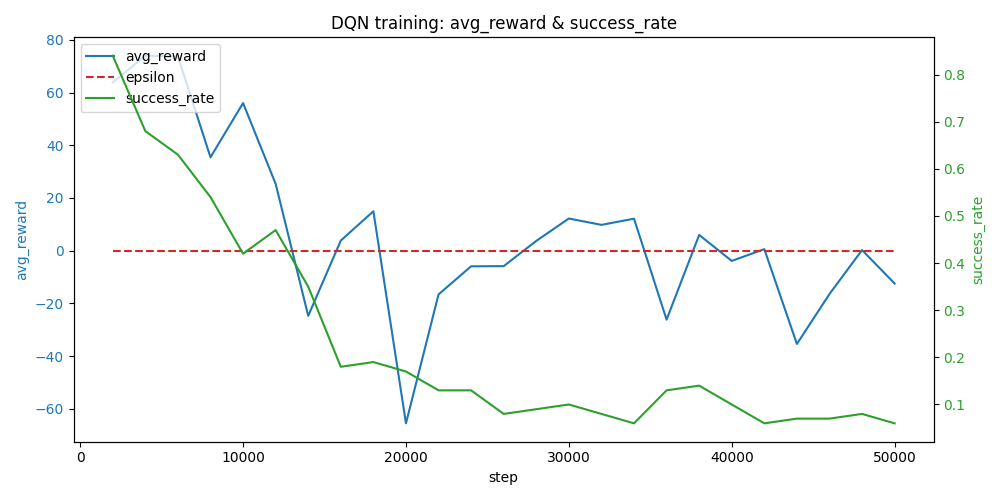

### 初期阶段（0~10,000步）：

avg_reward 较高（最高达73），说明智能体在早期能快速找到一些高回报策略。  
success_rate 也较高（>60%），表明初始策略有一定有效性。

### 中期阶段（10,000~20,000步）：  
avg_reward 开始剧烈波动并显著下降，甚至出现负值（如-65）。  
success_rate 持续下滑至约15%左右。

### 后期阶段（20,000~50,000步）：  
avg_reward 波动剧烈但整体趋于平稳，维持在[-40, +20]区间内。  
success_rate 基本稳定在 6%~14% 的低位。

### 结论：

训练过程存在明显的性能退化问题，尤其是在中后期，智能体未能持续优化策略，反而陷入次优或随机行为。

- 严重问题：成功率从84%降至6%，几乎完全失效，说明模型学习到了错误的策略或陷入局部最优

### 可能原因分析

正向奖励过强：delivery_success=500 是一个非常大的正奖励，可能导致智能体“作弊”——即使选择距离远、库存不足的医院，只要最终完成一次配送就能获得巨额奖励。

惩罚机制不足：虽然有 -500 的无库存惩罚，但如果系统允许“拆单”或“重定向”，这些动作本身也有负奖励，但可能不足以抵消成功奖励带来的激励。

状态空间表示不充分

库存被永久修改：每次训练都会改变真实医院库存，导致后续订单面临不同的环境状态。

这种“非静态环境”会破坏训练的稳定性，使智能体难以学到一致的策略。